# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных 


In [64]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Данные имеют 16 категориальных фичей и 3 числовых фичи (без учёта таргета)

In [65]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

В данных не встречается ни одного NaN значения

In [66]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [67]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

'TotalSpent' является количественной переменной, она не имеет NaN значений. Но столбец нельзя привести из object типа в числовой. Проблема в том, что отсутствующие значения заменены пробелом (' '). Таких значений всего 9 из 5282, так что их можно заменить на 0 без особых потерь.

In [68]:
data.TotalSpent=[float(i.replace(' ','0')) for i in data.TotalSpent]

Теперь мы можем преобразовать столбец 'TotalSpent' в числовой вид

In [69]:
data.TotalSpent = pd.to_numeric(data.TotalSpent)
data.TotalSpent.dtype

dtype('float64')

## Анализ данных 


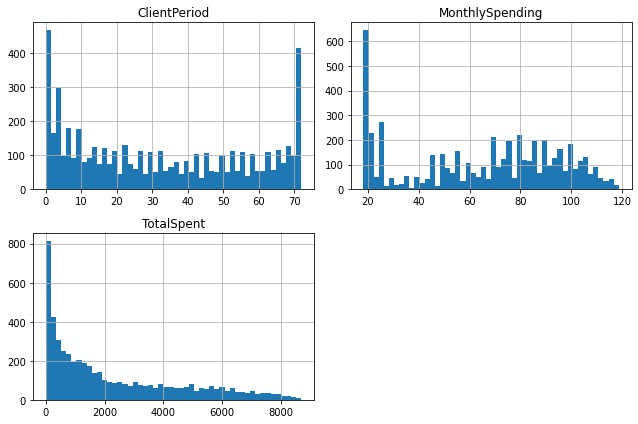

In [70]:
data[num_cols].hist(bins=50,figsize=(9,6))
plt.tight_layout()
plt.show()

Распределения отличаются от нормального, явных выбросов не наблюдается

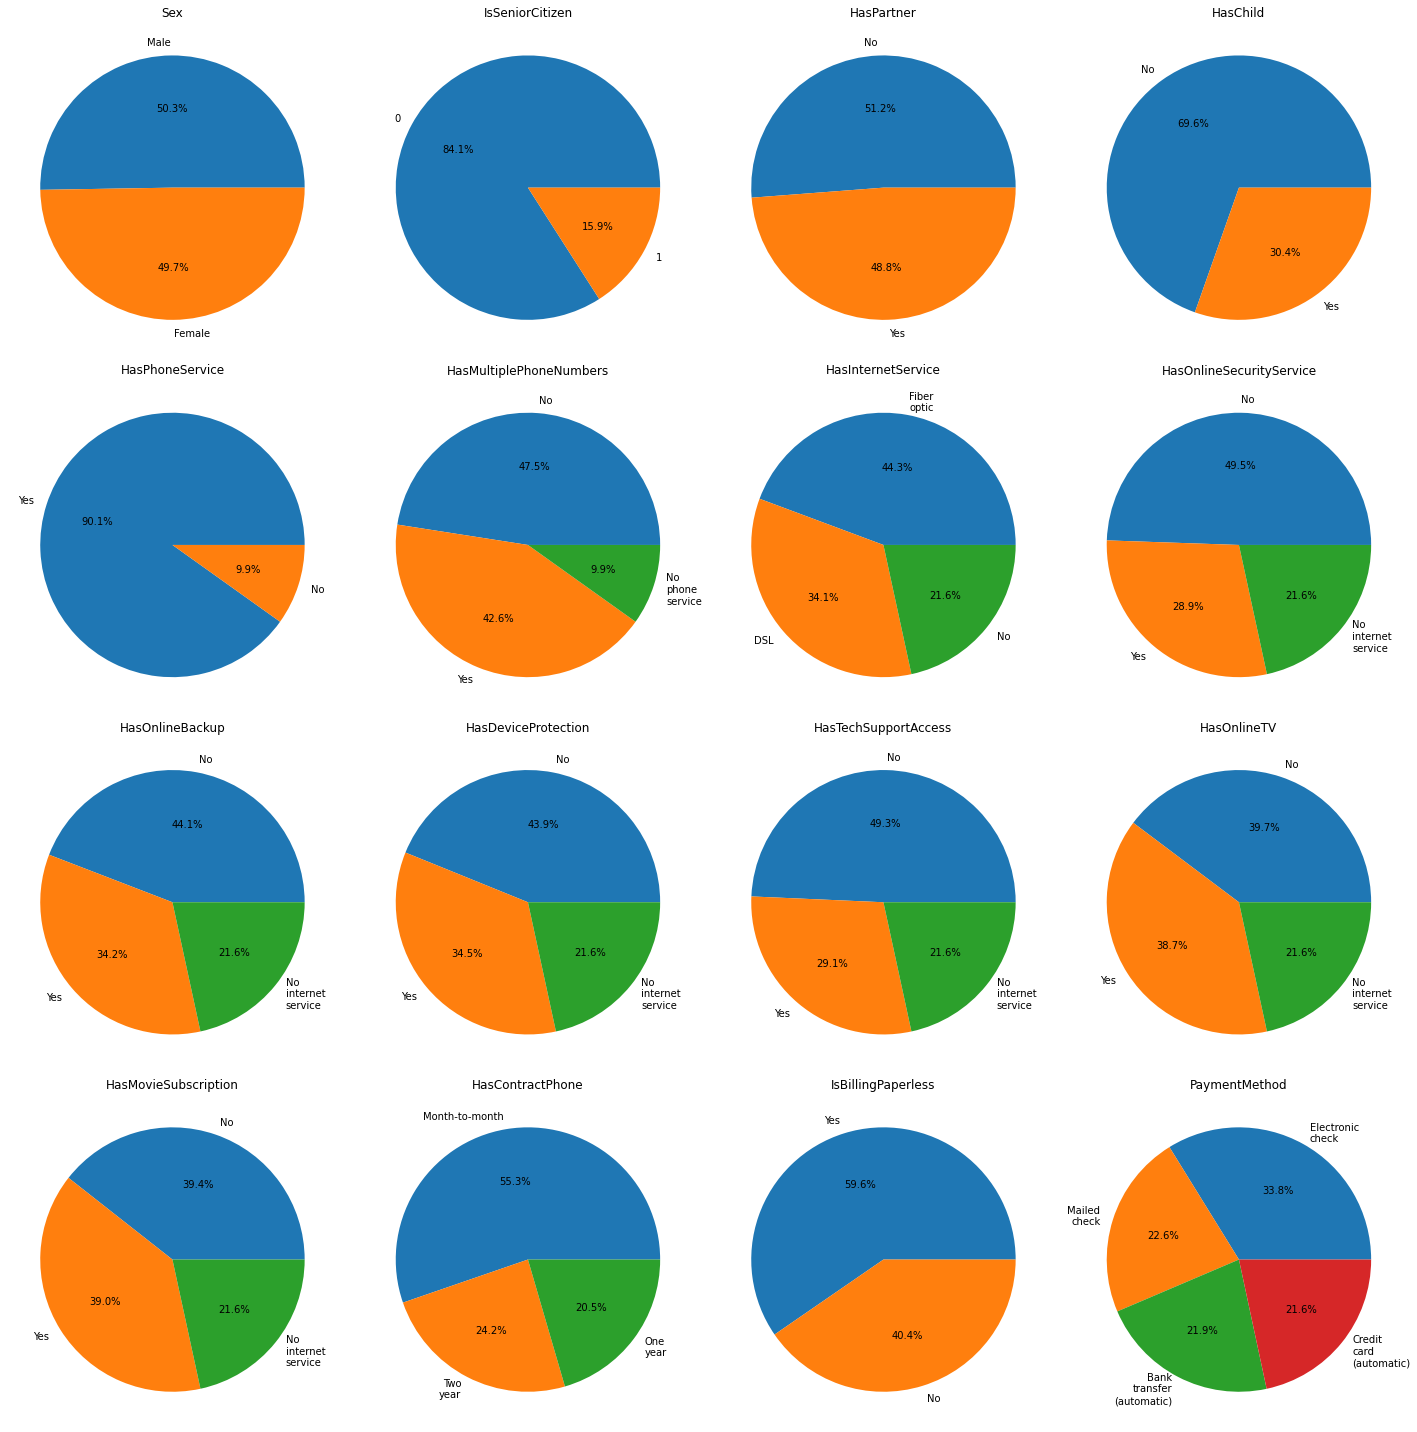

In [71]:
fig,ax=plt.subplots(4,4,figsize=(20,20))
                    
ax = ax.ravel()
                    
for i, column in enumerate(cat_cols):
    serie = data[column].value_counts()
    labels = list(serie.index)
    values = list(serie)
    ax[i].set_title(column)
    ax[i].pie(values,
              labels=[str(s).replace(' ', '\n') for s in labels],
              autopct='%1.1f%%')
plt.tight_layout()
plt.show()

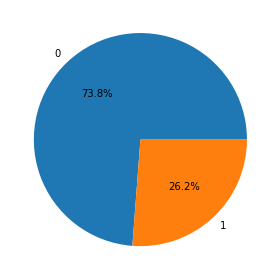

In [72]:
plt.pie(data[target_col].value_counts(), labels= list(data[target_col].value_counts().index), autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Классы несбалансированны, но не критично, отношение классов составляет примерно 1 к 3

#  Работ с моделями данных 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [74]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

transformer = ColumnTransformer(transformers=[
                                ('num', RobustScaler(), num_cols),
                                ('cat_label', OrdinalEncoder(), cat_cols),
                                ('cat_OH', OneHotEncoder(), cat_cols)
])

In [75]:
X1=transformer.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

In [77]:
param_grid = {
    'random_forest': {
       'model': RandomForestClassifier(),
        'params': {
           'n_estimators' : [100, 500, 1000],
            'max_features' :['log2', 'sqrt'],
            'max_depth':[1,  5, 9, 15]
            
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params': {
           'C': [0.001,0.01, 0.1, 1, 10, 100]            
        }        
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{'max_depth':[1,  5, 9, 15],
        'criterion':['gini', 'entropy', 'log_loss'],
          
        }      
    }
    
}

In [78]:
score_table = list()
for name, value in param_grid.items():
    clf = GridSearchCV(value['model'],value['params'],cv=5,scoring='roc_auc',n_jobs=-1)
    clf.fit(X1, y)
    score_table.append({
        'model': name ,
        'best_score': clf.best_score_ ,
        'best_params': clf.best_params_,
        'best_model': clf.best_estimator_
    })
    
score_table

[{'model': 'random_forest',
  'best_score': 0.8426433437571517,
  'best_params': {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500},
  'best_model': RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=500)},
 {'model': 'logistic_regression',
  'best_score': 0.8451167153983903,
  'best_params': {'C': 100},
  'best_model': LogisticRegression(C=100)},
 {'model': 'decision_tree',
  'best_score': 0.8271062588834457,
  'best_params': {'criterion': 'entropy', 'max_depth': 5},
  'best_model': DecisionTreeClassifier(criterion='entropy', max_depth=5)}]

In [79]:
clf=LogisticRegression(C=100)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)[:,1]

In [80]:
print(f'Результат: {roc_auc_score(y_test,y_pred)}')

Результат: 0.8304194193364108


## Применение градиентного бустинга 

In [81]:
from catboost import CatBoostClassifier
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
cat_classifier = CatBoostClassifier( cat_features=cat_cols)
cat_classifier.fit(X_train, y_train, verbose=False)
y_pred = cat_classifier.predict_proba(X_test)[:, 1]

In [83]:
print('Рузультат: {}'.format(roc_auc_score(y_test,y_pred)))

Рузультат: 0.8537806133506719


## Подбор оптимальных параметров

In [84]:
params = {
     'n_estimators': [100,150,200, 250],
    'max_depth': [2,4,5],
  'learning_rate':[0.01,0.05,0.1,0.15] 
}
grd=GridSearchCV(estimator=CatBoostClassifier(cat_features=cat_cols), param_grid=params, scoring='roc_auc', cv=5,n_jobs=-1);
grd.fit(X,y,verbose=False);

In [85]:
print(f'Счет: {grd.best_score_}\n Лучшие параметры: {grd.best_params_} ')

Счет: 0.8479822053555072
 Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100} 


In [86]:
cat_classifier = CatBoostClassifier( cat_features=cat_cols,learning_rate=0.1, max_depth=4, n_estimators=100)
cat_classifier.fit(X_train, y_train, verbose=False)
y_pred = cat_classifier.predict_proba(X_test)[:, 1]

In [87]:
print('Рузультат: {}'.format(roc_auc_score(y_test,y_pred)))

Рузультат: 0.8517374656841497


Применил простой граидентный бустинг, затем за счет перекресной проверки выбрал оптимальные парараметры.

Для градиентного бустинга счет с параметрами получился лучше.

# Предсказания

In [88]:
pipeline = make_pipeline(transformer,
                        CatBoostClassifier(learning_rate=0.1, max_depth=4, n_estimators=100,verbose=False)
)


pipeline.fit(X,y)
test = pd.read_csv('./test.csv')
test.TotalSpent=[float(i.replace(' ','0')) for i in test.TotalSpent]
y_predict=pipeline.predict_proba(test)[:,1]

In [89]:
submission = pd.read_csv('./submission.csv', index_col='Id')
submission['Churn'] = y_predict
submission.to_csv('./my_submission.csv')

In [90]:
submission.round(2)

,Churn
Id,
0,0.04
1,0.69
2,0.66
3,0.02
4,0.01
...,...
1756,0.15
1757,0.01
1758,0.83


## Скор на Kaggle 0.85232

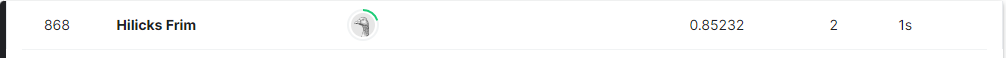